In [1]:
%matplotlib inline
%run 'bin/notebook_utils.py'

/Users/mturilli/Virtualenvs/RP-PAPER-IPDPS18/lib/python2.7/site-packages/radical/utils/atfork/stdlib_fixer.py:63: UserWarning: logging module already imported before fixup.
  warnings.warn('logging module already imported before fixup.')


In [2]:
# Load wrangled data saved in .csv files for both synapse, microbenchmarks and gromacs.
sws_sessions = pd.read_csv('data/synapse/weak_scaling/sessions.csv', index_col=0)
sws_pilots = pd.read_csv('data/synapse/weak_scaling/pilots.csv', index_col=0)
sws_units = pd.read_csv('data/synapse/weak_scaling/units.csv', index_col=0)

# Load wrangled data saved in .csv files for both synapse, microbenchmarks and gromacs.
ssc_sessions = pd.read_csv('data/synapse/strong_scaling/sessions.csv', index_col=0)
ssc_pilots = pd.read_csv('data/synapse/strong_scaling/pilots.csv', index_col=0)
ssc_units = pd.read_csv('data/synapse/strong_scaling/units.csv', index_col=0)

In [3]:
print 'Synapse: Weak Scaling: Total number of successful runs: %s' % sws_sessions.shape[0]
print 'Synapse: Weak Scaling: Total number of pilots: %s' % sws_pilots.shape[0]
print 'Synapse: Weak Scaling: Total number of units: %s\n' % sws_units.shape[0]

print 'Synapse: Strong Scaling: Total number of successful runs: %s' % ssc_sessions.shape[0]
print 'Synapse: Strong Scaling: Total number of pilots: %s' % ssc_pilots.shape[0]
print 'Synapse: Strong Scaling: Total number of units: %s\n' % ssc_units.shape[0]

Synapse: Weak Scaling: Total number of successful runs: 15
Synapse: Weak Scaling: Total number of pilots: 15
Synapse: Weak Scaling: Total number of units: 12224

Synapse: Strong Scaling: Total number of successful runs: 5
Synapse: Strong Scaling: Total number of pilots: 5
Synapse: Strong Scaling: Total number of units: 81920



In [4]:
sws = sws_sessions[sws_sessions.experiment == 'exp1'][
    ['nunit','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING','U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING']
        ].groupby(['nunit']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std']})

sws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_EXECUTING'   :'TTX'}, axis='columns', inplace=True)
sws.rename(index={i: '%s/%s' % (i, i*32) for i in sws.index.get_values()}, inplace=True)
sws

TTQ                Agent queueing            Agent queueing execution                   TTX                      TTC                Agent scheduling           
                     mean            std           mean        std                     mean       std        mean        std          mean            std             mean        std
nunit                                                                                                                                                                                
32/1024         376.17170     454.034961        0.33265   0.011526                  0.56305  0.006435   902.61050   3.436115    1462.53525     578.504776         0.289950   0.009404
64/2048         953.82985    1258.176663        0.82940   0.044406                  1.15940  0.015132   940.12655   0.003606    2075.82835    1376.075263         0.722000   0.029698
128/4096       1482.34230    1361.416162        1.93360   0.060953                  2.97690  0.231082   922.77575   3.545363    2514.00745    1364.736523         1.739001   0.057415
256/8192      15661.68065     215.067447        5.37200   0.008910                 14.34745  2.186444   978.65000  17.178594   16827.76960      89.619138         4.955049   0.012231
512/16384    138008.13775  194402.885826        9.68035   0.453468                 59.99210  5.236267  1019.28595  24.826590  139237.99160  194521.397983         8.648402   0.302925
1024/32768   180526.16485  139177.655438       49.39715  16.769815                153.19430  0.100551  1157.04735  10.245765  181891.89560  139304.898667        45.577102  15.803693
2048/65536    34266.88055   23283.984241      242.52515   3.192941                369.11190  2.443760  1428.51745  36.404898   35885.24325   23357.500578       225.011101   5.062887
4096/131072  736775.59040            NaN      737.18650        NaN                907.90640       NaN  2143.19690        NaN  739237.70420            NaN       665.269003        NaN

In [5]:
ssc = ssc_sessions[ssc_sessions.experiment == 'exp1'][
    ['ncore','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING','U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING']
        ].groupby(['ncore']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std']})

ssc.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
ssc.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
ssc.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
ssc.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
ssc.rename({'U_AGENT_EXECUTING'   :'TTX'}, axis='columns', inplace=True)
ssc.rename(index={i: '%s/%s' % (ssc_sessions[ssc_sessions.ncore == i].nunit[0], i) for i in ssc.index.get_values()}, 
           inplace=True)
ssc

TTQ                Agent queueing            Agent queueing execution                     TTX                       TTC                Agent scheduling            
                     mean            std           mean        std                     mean        std         mean         std          mean            std             mean         std
ncore                                                                                                                                                                                    
16384/16432  138110.59200            NaN       243.9984        NaN               128.151482        NaN  27843.57870         NaN  166060.37680            NaN     26942.812703         NaN
16384/32816  117918.90005   52845.711064       480.8133   3.718533               184.740061  89.250795  14358.29425  258.935079  132400.46195   52624.290475     13405.488704  238.037170
16384/65584  346639.07670  472754.901373      1030.9101  14.207755               121.923205   3.088517   7611.91810   29.168296  354369.67560  472793.501342      6632.908649    8.731992

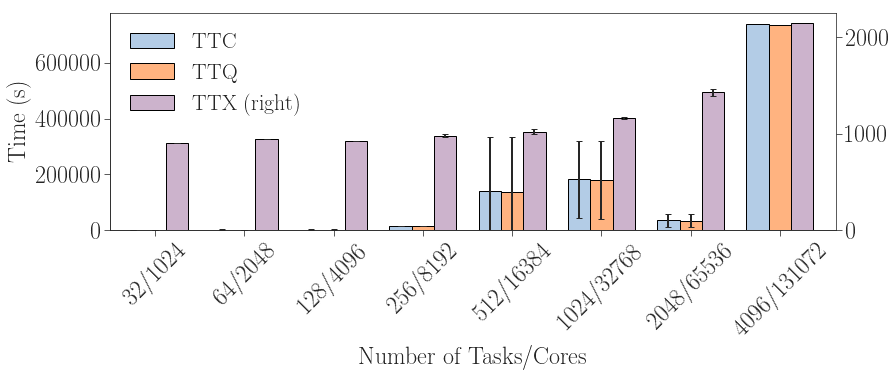

In [6]:
fig, ax = fig_setup(figsize=(13,4))

# Plot means and std bars
sws['TTC'].reset_index().plot.bar(
    x='nunit', y='mean', yerr='std',
    position=1.5, width=0.25, color=tableau20[1], ax=ax, rot=45,
    label='TTC')

sws['TTQ'].reset_index().plot.bar(
    x='nunit', y='mean', yerr='std',
    position=0.5, width=0.25, color=tableau20[3], ax=ax, rot=45,
    label='TTQ')

sws['TTX'].reset_index().plot.bar(
    x='nunit', y='mean', yerr='std', 
    position=-0.5, width=0.25, color=tableau20[9], ax=ax, rot=45, secondary_y=True,
    label='TTX')

ax.set_xlabel('Number of Tasks/Cores')
ax.set_ylabel('Time (s)')
ax.set_ylim(0)
ax.set_xlim(-0.5)

plt.savefig('figures/paper_titan_rp_synapse_weak_scaling.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/screen_titan_rp_synapse_weak_scaling.png')

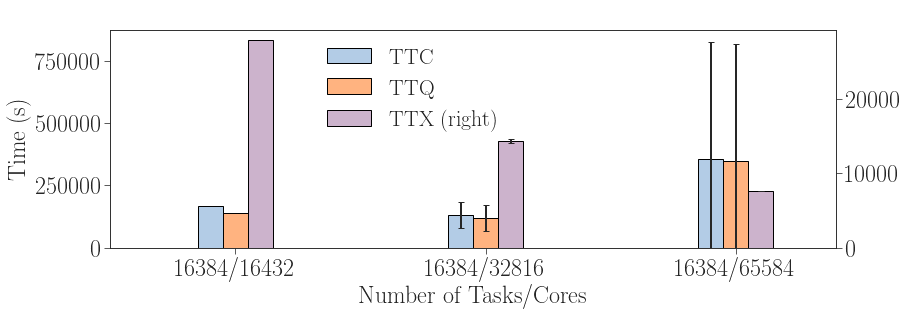

In [7]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

# Plot means and std bars
ssc['TTC'].reset_index().plot.bar(
    x='ncore', y='mean', yerr='std',
    position=1.5, width=0.1, color=tableau20[1], ax=ax, rot=0,
    legend=False)

ssc['TTQ'].reset_index().plot.bar(
    x='ncore', y='mean', yerr='std',
    position=0.5, width=0.1, color=tableau20[3], ax=ax, rot=0,
    legend=False)

ssc['TTX'].reset_index().plot.bar(
    x='ncore', y='mean', yerr='std', 
    position=-0.5, width=0.1, color=tableau20[9], ax=ax, rot=0, 
    legend=False,
    secondary_y=True)

ax.set_xlabel('Number of Tasks/Cores')
ax.set_ylabel('Time (s)')
ax.set_ylim(0)
ax.set_xlim(-0.5)

# Add common legend with f* proxy artists (https://matplotlib.org/users/legend_guide.html)
fig.legend((mpl.patches.Patch(facecolor=tableau20[1]), mpl.patches.Patch(facecolor=tableau20[3]), mpl.patches.Patch(facecolor=tableau20[9])),
           ('TTC', 'TTQ', 'TTX (right)'), 
           'upper center',
           bbox_to_anchor=(0.44, 1))

plt.savefig('figures/paper_titan_rp_synapse_strong_scaling.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/screen_titan_rp_synapse_strong_scaling.png')

In [8]:
# Load sessions for Synapse experiment 1
ws_sras = load_sessions_units('/Users/mturilli/Projects/RADICAL/github/experiments/rp-paper-ipdps2018/analysis/data/synapse/weak_scaling', 
                     sws_sessions, 
                     sorted(sws_sessions.nunit.unique().tolist()))

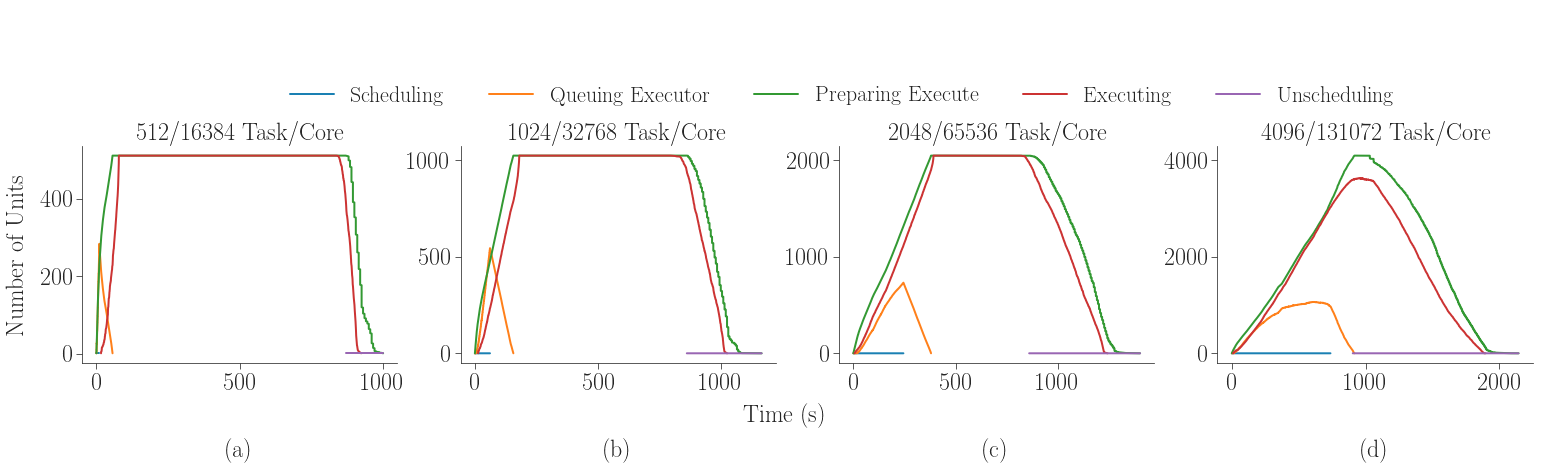

In [9]:
nunits = [512, 1024, 2048, 4096]
fwidth = 26
fhight = 4
fig, axarr = plt.subplots(1, len(nunits), sharex='col', figsize=(fwidth,fhight))#, sharey='row')

i = 0
j = 'a'
for nunit in nunits:
    session  = ws_sras[nunit][0]
    base = session.concurrency(
            event=[
             {ru.STATE: None, ru.EVENT: 'schedule_try'},
             {ru.STATE: None, ru.EVENT: 'schedule_ok'}]
           )[0][0]
    ax = axarr[i]
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    ax.title.set_text('%s/%s Task/Core' % (nunit, nunit*32))

    # How many units are being scheduled
    scu = session.concurrency(event=[
     {ru.STATE: None, ru.EVENT: 'schedule_try'},               # Scheduling start
     {ru.STATE: None, ru.EVENT: 'schedule_ok'}])               # Scheduling stop
    x = [item[0]-base for item in scu]
    y = [item[1] for item in scu]
    ax.plot(x, y, color=tableau20[0])

    # How many units are being queued for execution
    scu = session.concurrency(event=[
     {ru.STATE: 'AGENT_EXECUTING_PENDING', ru.EVENT: 'state'}, # Queuing Execution start
     {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'}])        # Queuing Execution stop  
    x = [item[0]-base for item in scu]
    y = [item[1] for item in scu]
    ax.plot(x, y, color=tableau20[2])

    # How many units are being prepared for execution
    scu = session.concurrency(event=[
     {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'},         # Preparing Execution start
     {ru.STATE: None, ru.EVENT: 'exec_stop'}])                 # Preparing Execution stop
    x = [item[0]-base for item in scu]
    y = [item[1] for item in scu]
    ax.plot(x, y, color=tableau20[4])

    # How many units are being executed
    scu = session.concurrency(event=[
     {ru.STATE: None, ru.EVENT: 'app_start'},                   # Execution start
     {ru.STATE: None, ru.EVENT: 'app_stop'}])                   # Executed
    x = [item[0]-base for item in scu]
    y = [item[1] for item in scu]
    ax.plot(x, y, color=tableau20[6])

    # How many units are being unscheduled
    scu = session.concurrency(event=[
     {ru.STATE: None, ru.EVENT: 'unschedule_start'},            # Unscheduling start
     {ru.STATE: None, ru.EVENT: 'unschedule_stop'}])            # Unscheduling stop
    x = [item[0]-base for item in scu]
    y = [item[1] for item in scu]
    ax.plot(x, y, color=tableau20[8])

    # Add subfigure label and increment counters
    ax.set_xlabel('(%s)' % j, labelpad=45)
    i = i+1
    j = chr(ord(j) + 1)

# Add common axes lables
fig.text(0.085, 0.5, 'Number of Units', va='center', rotation='vertical')
fig.text(0.5, -0.08, 'Time (s)', ha='center')

# Add common legend with f* proxy artists (https://matplotlib.org/users/legend_guide.html)
fig.legend((
                mpl.lines.Line2D([], [], color=tableau20[0]), mpl.lines.Line2D([], [], color=tableau20[2]),
                mpl.lines.Line2D([], [], color=tableau20[4]), mpl.lines.Line2D([], [], color=tableau20[6]),
                mpl.lines.Line2D([], [], color=tableau20[8])
           ),
           (
                'Scheduling', 'Queuing Executor', 
                'Preparing Execute', 'Executing', 
                'Unscheduling'
           ), 
           'upper center',
           bbox_to_anchor=(0.45, 1.4),
           ncol=5)

plt.savefig('figures/paper_titan_rp_synapse_weak_scaling_concurrency_horizontal.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/screen_titan_rp_synapse_weak_scaling_concurrency_horizontal.png')

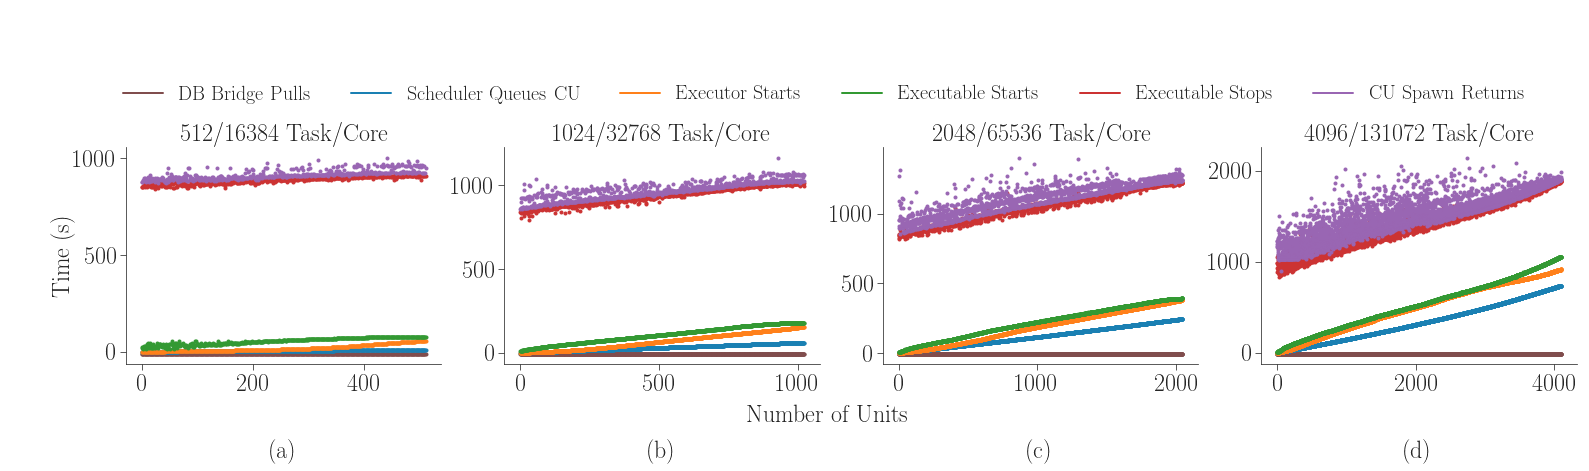

In [10]:
nunits = [512, 1024, 2048, 4096]
fwidth = 26
fhight = 4
fig, axarr = plt.subplots(1, len(nunits), sharex='col', figsize=(fwidth,fhight))#, sharey='row')

i = 0
j = 'a'
for nunit in nunits:
    session  = ws_sras[nunit][0]

    # Get events and order them by Scheduling
    df = get_df_unit_events(session)
    df = df.sort_values(by='Scheduler Queues CU')
    df = df.reset_index(drop=True)
    df = df[['Scheduler Starts Schedule' , 'Scheduler Stops Schedule', 'Scheduler Queues CU'  , 'Executor Starts'            ,
             'Executor Starts Mkdir'     , 'Executor Stops Mkdir'    , 'Executor Spawns CU'   , 'OS Accepts Spawned CU'      ,
             'OS Spawns CU'              , 'CU Changes Dir'          , 'CU Starts Pre-execute', 'CU Stops Pre-execute'       ,
             'CU Spawns Executable'      , 'Executable Starts'       , 'Executable Stops'     , 'CU Spawn Returns'           ,
             'CU Starts Post-execute'    , 'CU Stops Post-execute'   , 'Executor Stops'       , 'Scheduler Starts Unschedule',
             'Scheduler Stops Unschedule', 'DB Bridge Pulls']]
    df = df.dropna(axis=1, how='all')
    df = df.sub(df['Scheduler Starts Schedule'][0])

    # Set axes properties
    ax = axarr[i]
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    ax.title.set_text('%s/%s Task/Core' % (nunit, nunit*32))

    # Plot data
    ax.scatter(df['DB Bridge Pulls'].index    , df['DB Bridge Pulls']    , marker='.', color=tableau20[10]) # Agent Scheduling Component
    ax.scatter(df['Scheduler Queues CU'].index, df['Scheduler Queues CU'], marker='.', color=tableau20[0] ) # Agent Scheduling Component
    ax.scatter(df['Executor Starts'].index    , df['Executor Starts']    , marker='.', color=tableau20[2] ) # Agent Executing Component
    ax.scatter(df['Executable Starts'].index  , df['Executable Starts']  , marker='.', color=tableau20[4] ) # Synapse
    ax.scatter(df['Executable Stops'].index   , df['Executable Stops']   , marker='.', color=tableau20[6] ) # Synapse, orterun [orterun spawner]
    ax.scatter(df['CU Spawn Returns'].index   , df['CU Spawn Returns']   , marker='.', color=tableau20[8] ) # CU script
    
    # Add subfigure label and increment counters
    ax.set_xlabel('(%s)' % j, labelpad=45)
    i = i+1
    j = chr(ord(j) + 1)

# Add common axes lables
fig.text(0.085, 0.5, 'Time (s)', va='center', rotation='vertical')
fig.text(0.5, -0.08, 'Number of Units', ha='center')
    
# Add common legend with f* proxy artists (https://matplotlib.org/users/legend_guide.html)
fig.legend((
                mpl.lines.Line2D([], [], color=tableau20[10]),
                mpl.lines.Line2D([], [], color=tableau20[0] ), 
                mpl.lines.Line2D([], [], color=tableau20[2] ),
                mpl.lines.Line2D([], [], color=tableau20[4] ), 
                mpl.lines.Line2D([], [], color=tableau20[6] ),
                mpl.lines.Line2D([], [], color=tableau20[8] )
           ),
           (
                'DB Bridge Pulls',
                'Scheduler Queues CU',
                'Executor Starts',
                'Executable Starts',
                'Executable Stops',
                'CU Spawn Returns',
           ), 
           'upper center',
           bbox_to_anchor=(0.44, 1.4),
           fontsize=20,
           ncol=6)

plt.savefig('figures/paper_titan_rp_synapse_weak_scaling_events_timeline_horizontal.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/screen_titan_rp_synapse_weak_scaling_events_timeline_horizontal.png')

In [11]:
# Load sessions for Synapse experiment 1
ss_sras = load_sessions_cores('/Users/mturilli/Projects/RADICAL/github/experiments/rp-paper-ipdps2018/analysis/data/synapse/strong_scaling', 
                         ssc_sessions, 
                         sorted(ssc_sessions.ncore.unique().tolist()))

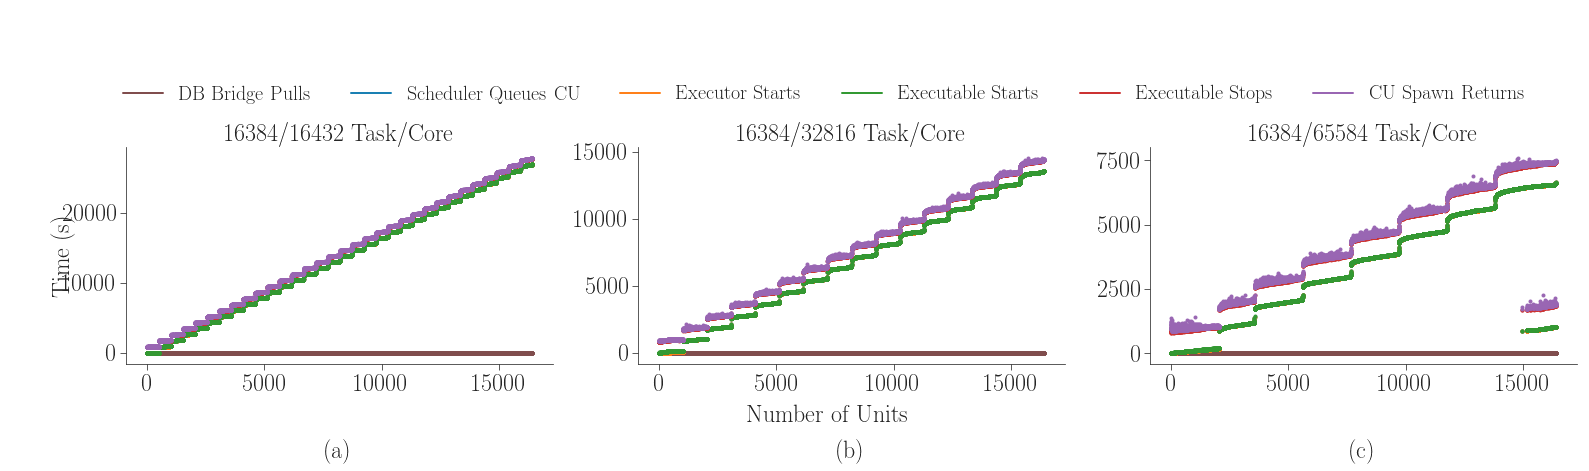

In [12]:
ncores = [16432,32816,65584]
fwidth = 26
fhight = 4
fig, axarr = plt.subplots(1, len(ncores), sharex='col', figsize=(fwidth,fhight))#, sharey='row')

i = 0
j = 'a'
for ncore in ncores:
    session  = ss_sras[ncore][0]
    nunit = ssc_sessions[ssc_sessions.ncore == ncore].nunit.unique().tolist()[0]

    # Get events and order them by Scheduling
    df = get_df_unit_events(session)
    df = df.sort_values(by='Scheduler Queues CU')
    df = df.reset_index(drop=True)
    df = df[['Scheduler Starts Schedule' , 'Scheduler Stops Schedule', 'Scheduler Queues CU'  , 'Executor Starts'            ,
             'Executor Starts Mkdir'     , 'Executor Stops Mkdir'    , 'Executor Spawns CU'   , 'OS Accepts Spawned CU'      ,
             'OS Spawns CU'              , 'CU Changes Dir'          , 'CU Starts Pre-execute', 'CU Stops Pre-execute'       ,
             'CU Spawns Executable'      , 'Executable Starts'       , 'Executable Stops'     , 'CU Spawn Returns'           ,
             'CU Starts Post-execute'    , 'CU Stops Post-execute'   , 'Executor Stops'       , 'Scheduler Starts Unschedule',
             'Scheduler Stops Unschedule', 'DB Bridge Pulls']]
    df = df.dropna(axis=1, how='all')
    df = df.sub(df['Scheduler Starts Schedule'][0])

    # Set axes properties
    ax = axarr[i]
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    ax.title.set_text('%s/%s Task/Core' % (nunit, ncore))

    # Plot data
    ax.scatter(df['DB Bridge Pulls'].index    , df['DB Bridge Pulls']    , marker='.', color=tableau20[10]) # Agent Scheduling Component
    ax.scatter(df['Scheduler Queues CU'].index, df['Scheduler Queues CU'], marker='.', color=tableau20[0] ) # Agent Scheduling Component
    ax.scatter(df['Executor Starts'].index    , df['Executor Starts']    , marker='.', color=tableau20[2] ) # Agent Executing Component
    ax.scatter(df['Executable Starts'].index  , df['Executable Starts']  , marker='.', color=tableau20[4] ) # Synapse
    ax.scatter(df['Executable Stops'].index   , df['Executable Stops']   , marker='.', color=tableau20[6] ) # Synapse, orterun [orterun spawner]
    ax.scatter(df['CU Spawn Returns'].index   , df['CU Spawn Returns']   , marker='.', color=tableau20[8] ) # CU script
    
    # Add subfigure label and increment counters
    ax.set_xlabel('(%s)' % j, labelpad=45)
    i = i+1
    j = chr(ord(j) + 1)

# Add common axes lables
fig.text(0.075, 0.5, 'Time (s)', va='center', rotation='vertical')
fig.text(0.5, -0.08, 'Number of Units', ha='center')
    
# Add common legend with f* proxy artists (https://matplotlib.org/users/legend_guide.html)
fig.legend((
                mpl.lines.Line2D([], [], color=tableau20[10]),
                mpl.lines.Line2D([], [], color=tableau20[0] ), 
                mpl.lines.Line2D([], [], color=tableau20[2] ),
                mpl.lines.Line2D([], [], color=tableau20[4] ), 
                mpl.lines.Line2D([], [], color=tableau20[6] ),
                mpl.lines.Line2D([], [], color=tableau20[8] )
           ),
           (
                'DB Bridge Pulls',
                'Scheduler Queues CU',
                'Executor Starts',
                'Executable Starts',
                'Executable Stops',
                'CU Spawn Returns',
           ), 
           'upper center',
           bbox_to_anchor=(0.44, 1.4),
           fontsize=20,
           ncol=6)

plt.savefig('figures/paper_titan_rp_synapse_strong_scaling_events_timeline_horizontal.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/screen_titan_rp_synapse_strong_scaling_events_timeline_horizontal.png')

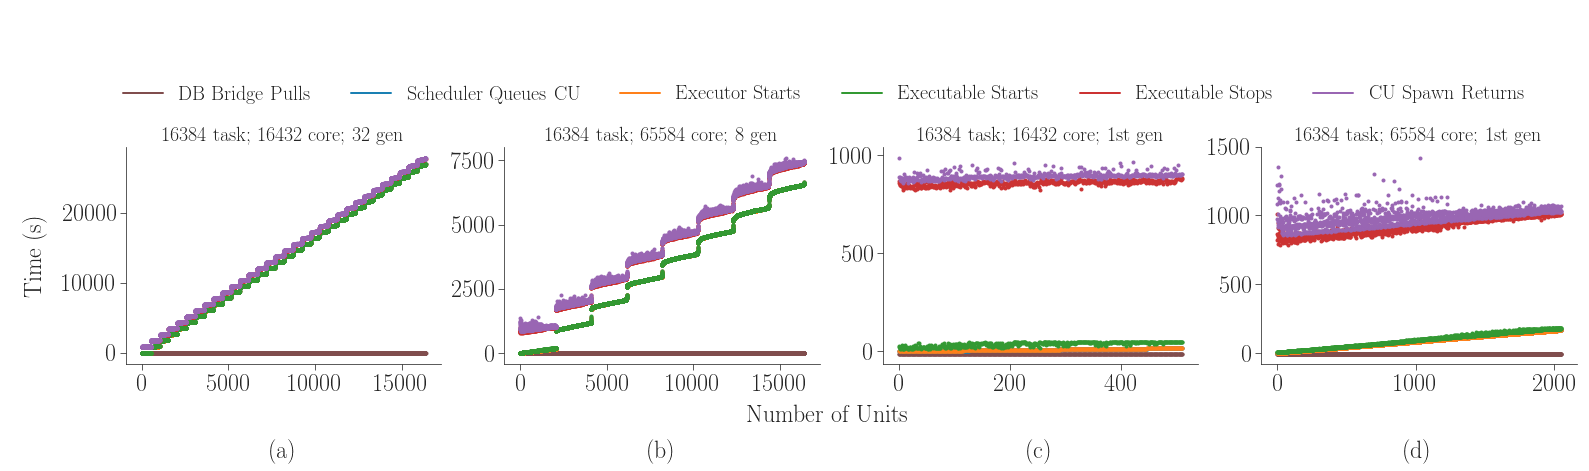

In [26]:
ncores = [16432,65584]
fwidth = 26
fhight = 4
fig, axarr = plt.subplots(1, 4, sharex='col', figsize=(fwidth,fhight))#, sharey='row')

# ------------------------------------------------------------
# Plot baselines with all the generations
# ------------------------------------------------------------
i = 0
j = 'a'
for ncore in ncores:
    session  = ss_sras[ncore][0]
    nunit = ssc_sessions[ssc_sessions.ncore == ncore].nunit.unique().tolist()[0]
    ngen = int(nunit/((ncore-48)/32.0))
    nunit_gen = int(nunit/ngen)

    # Get events and order them by Scheduling
    df = get_df_unit_events(session)
    df = df.sort_values(by='Scheduler Queues CU')
    df = df.reset_index(drop=True)
    df = df[['Scheduler Starts Schedule', 'Scheduler Queues CU'  , 'Executor Starts' , 
             'Executable Starts'        , 'Executable Stops'     , 'CU Spawn Returns', 
             'DB Bridge Pulls']]
    df = df.dropna(axis=1, how='all')
    df = df.sub(df['Scheduler Starts Schedule'][0])

    # Set axes properties
    ax = axarr[i]
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    ax.title.set_text('%s task; %s core; %s gen' % (nunit, ncore, ngen))
    ax.title.set_size(20)

    # Plot data
    ax.scatter(df['DB Bridge Pulls'].index    , df['DB Bridge Pulls']    , marker='.', color=tableau20[10]) # Agent Scheduling Component
    ax.scatter(df['Scheduler Queues CU'].index, df['Scheduler Queues CU'], marker='.', color=tableau20[0] ) # Agent Scheduling Component
    ax.scatter(df['Executor Starts'].index    , df['Executor Starts']    , marker='.', color=tableau20[2] ) # Agent Executing Component
    ax.scatter(df['Executable Starts'].index  , df['Executable Starts']  , marker='.', color=tableau20[4] ) # Synapse
    ax.scatter(df['Executable Stops'].index   , df['Executable Stops']   , marker='.', color=tableau20[6] ) # Synapse, orterun [orterun spawner]
    ax.scatter(df['CU Spawn Returns'].index   , df['CU Spawn Returns']   , marker='.', color=tableau20[8] ) # CU script

    # Add subfigure label and increment counters
    ax.set_xlabel('(%s)' % j, labelpad=45)
    i = i+1
    j = chr(ord(j) + 1)


# ------------------------------------------------------------
# Plot only the first generation of the smaller and bigger run
# ------------------------------------------------------------
i = 2
j = 'c'
for ncore in ncores:
    session  = ss_sras[ncore][0]
    nunit = ssc_sessions[ssc_sessions.ncore == ncore].nunit.unique().tolist()[0]
    ngen = int(nunit/((ncore-48)/32.0))
    nunit_gen = int(nunit/ngen)

    # Get events and order them by Scheduling
    df = get_df_unit_events(session)
    df = df.sort_values(by='Scheduler Queues CU')
    df = df.head(nunit_gen)
    df = df.reset_index(drop=True)
    df = df[['Scheduler Starts Schedule', 'Scheduler Queues CU'  , 'Executor Starts' , 
             'Executable Starts'        , 'Executable Stops'     , 'CU Spawn Returns', 
         'DB Bridge Pulls']]
    df = df.dropna(axis=1, how='all')
    df = df.sub(df['Scheduler Starts Schedule'][0])

    # Set axes properties
    ax = axarr[i]
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    ax.title.set_text('%s task; %s core; 1st gen' % (nunit, ncore))
    ax.title.set_size(20)

    # Plot data
    ax.scatter(df['DB Bridge Pulls'].index    , df['DB Bridge Pulls']    , marker='.', color=tableau20[10]) # Agent Scheduling Component
    ax.scatter(df['Scheduler Queues CU'].index, df['Scheduler Queues CU'], marker='.', color=tableau20[0] ) # Agent Scheduling Component
    ax.scatter(df['Executor Starts'].index    , df['Executor Starts']    , marker='.', color=tableau20[2] ) # Agent Executing Component
    ax.scatter(df['Executable Starts'].index  , df['Executable Starts']  , marker='.', color=tableau20[4] ) # Synapse
    ax.scatter(df['Executable Stops'].index   , df['Executable Stops']   , marker='.', color=tableau20[6] ) # Synapse, orterun [orterun spawner]
    ax.scatter(df['CU Spawn Returns'].index   , df['CU Spawn Returns']   , marker='.', color=tableau20[8] ) # CU script
    
    # Add subfigure label and increment counters
    ax.set_xlabel('(%s)' % j, labelpad=45)
    i = i+1
    j = chr(ord(j) + 1)


# ------------------------------------------------------------
# Add common axes lables and legend
# ------------------------------------------------------------
fig.text(0.07, 0.5, 'Time (s)', va='center', rotation='vertical')
fig.text(0.5, -0.08, 'Number of Units', ha='center')
    
# Add common legend with f* proxy artists (https://matplotlib.org/users/legend_guide.html)
fig.legend((
                mpl.lines.Line2D([], [], color=tableau20[10]),
                mpl.lines.Line2D([], [], color=tableau20[0] ), 
                mpl.lines.Line2D([], [], color=tableau20[2] ),
                mpl.lines.Line2D([], [], color=tableau20[4] ), 
                mpl.lines.Line2D([], [], color=tableau20[6] ),
                mpl.lines.Line2D([], [], color=tableau20[8] )
           ),
           (
                'DB Bridge Pulls',
                'Scheduler Queues CU',
                'Executor Starts',
                'Executable Starts',
                'Executable Stops',
                'CU Spawn Returns',
           ), 
           'upper center',
           bbox_to_anchor=(0.44, 1.4),
           fontsize=20,
           ncol=6)

plt.savefig('figures/paper_titan_rp_synapse_strong_scaling_events_timeline_1stgen_horizontal.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/screen_titan_rp_synapse_strong_scaling_events_timeline_1stgen_horizontal.png')

Text(0,0.5,u'Number of Units')

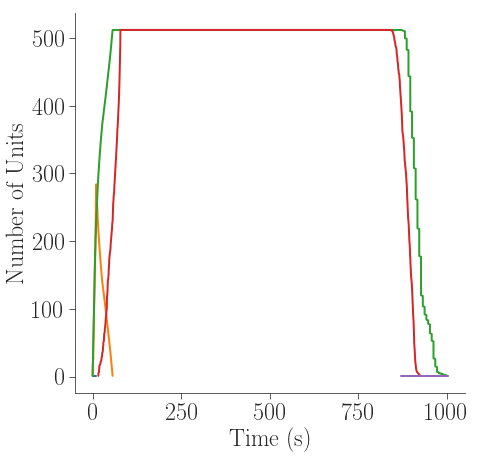

In [14]:
fig, ax = fig_setup(figsize=(7,7))
session  = ws_sras[512][0]

base = session.concurrency(
        event=[
         {ru.STATE: None, ru.EVENT: 'schedule_try'},
         {ru.STATE: None, ru.EVENT: 'schedule_ok'}]
       )[0][0]

# How many units are being scheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'schedule_try'},               # Scheduling start
 {ru.STATE: None, ru.EVENT: 'schedule_ok'}])               # Scheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[6])

# How many units are being queued for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING_PENDING', ru.EVENT: 'state'}, # Queuing Execution start
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'}])        # Queuing Execution stop  
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[4])

# How many units are being prepared for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'},         # Preparing Execution start
 {ru.STATE: None, ru.EVENT: 'exec_stop'}])                 # Preparing Execution stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[12])

# How many units are being executed
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'app_start'},                   # Execution start
 {ru.STATE: None, ru.EVENT: 'app_stop'}])                   # Executed
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[0])

# How many units are being unscheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'unschedule_start'},            # Unscheduling start
 {ru.STATE: None, ru.EVENT: 'unschedule_stop'}])            # Unscheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[8])

# ax.legend(ncol=3, loc='upper left', bbox_to_anchor=(0,1.25),
#           labels=['Scheduling', 'Queuing Executor', 'Preparing Execute', 
#                   # 'Checking Directory', 'Spawning', 
#                   'Executing', 'Unscheduling'])
plt.xlabel('Time (s)')
plt.ylabel('Number of Units')

#ax.set_ylim(0,4096)
#ax.set_xlim(0,2143)

# plt.savefig('figures/paper_titan_rp_synapse_weak_scaling_concurrency_512.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('figures/screen_titan_rp_synapse_weak_scaling_concurrency_512.pdf', dpi=72, bbox_inches='tight')

Text(0,0.5,u'Number of Units')

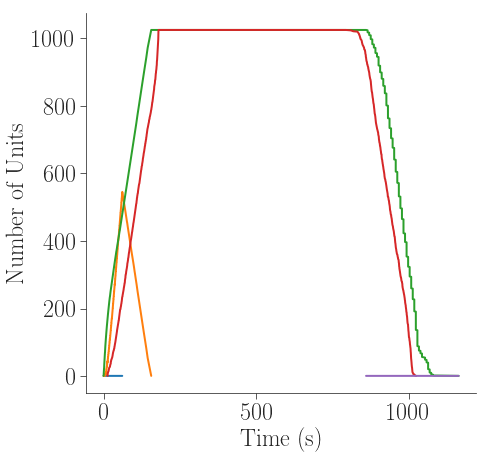

In [15]:
fig, ax = fig_setup(figsize=(7,7))
ssize = 1024
session  = ws_sras[ssize][0]

base = session.concurrency(
        event=[
         {ru.STATE: None, ru.EVENT: 'schedule_try'},
         {ru.STATE: None, ru.EVENT: 'schedule_ok'}]
       )[0][0]

# How many units are being scheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'schedule_try'},               # Scheduling start
 {ru.STATE: None, ru.EVENT: 'schedule_ok'}])               # Scheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[6])

# How many units are being queued for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING_PENDING', ru.EVENT: 'state'}, # Queuing Execution start
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'}])        # Queuing Execution stop  
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[4])

# How many units are being prepared for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'},         # Preparing Execution start
 {ru.STATE: None, ru.EVENT: 'exec_stop'}])                 # Preparing Execution stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[12])

# How many units are being executed
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'app_start'},                   # Execution start
 {ru.STATE: None, ru.EVENT: 'app_stop'}])                   # Executed
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[0])

# How many units are being unscheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'unschedule_start'},            # Unscheduling start
 {ru.STATE: None, ru.EVENT: 'unschedule_stop'}])            # Unscheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[8])

# ax.legend(ncol=3, loc='upper left', bbox_to_anchor=(0,1.25),
#           labels=['Scheduling', 'Queuing Executor', 'Preparing Execute', 
#                   # 'Checking Directory', 'Spawning', 
#                   'Executing', 'Unscheduling'])
plt.xlabel('Time (s)')
plt.ylabel('Number of Units')

#ax.set_ylim(0,4096)
#ax.set_xlim(0,2143)

# plt.savefig('figures/paper_titan_rp_synapse_weak_scaling_concurrency_%s.pdf' % ssize, dpi=300, bbox_inches='tight')
# plt.savefig('figures/screen_titan_rp_synapse_weak_scaling_concurrency_%s.pdf' % ssize, dpi=72, bbox_inches='tight')

Text(0,0.5,u'Number of Units')

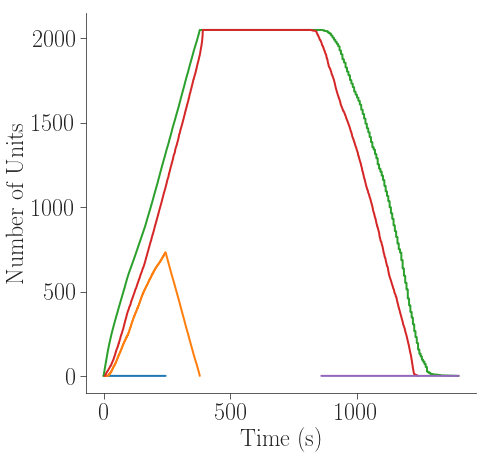

In [16]:
fig, ax = fig_setup(figsize=(7,7))
ssize = 2048
session  = ws_sras[ssize][0]

base = session.concurrency(
        event=[
         {ru.STATE: None, ru.EVENT: 'schedule_try'},
         {ru.STATE: None, ru.EVENT: 'schedule_ok'}]
       )[0][0]

# How many units are being scheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'schedule_try'},               # Scheduling start
 {ru.STATE: None, ru.EVENT: 'schedule_ok'}])               # Scheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[6])

# How many units are being queued for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING_PENDING', ru.EVENT: 'state'}, # Queuing Execution start
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'}])        # Queuing Execution stop  
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[4])

# How many units are being prepared for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'},         # Preparing Execution start
 {ru.STATE: None, ru.EVENT: 'exec_stop'}])                 # Preparing Execution stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[12])

# How many units are being executed
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'app_start'},                   # Execution start
 {ru.STATE: None, ru.EVENT: 'app_stop'}])                   # Executed
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[0])

# How many units are being unscheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'unschedule_start'},            # Unscheduling start
 {ru.STATE: None, ru.EVENT: 'unschedule_stop'}])            # Unscheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[8])

# ax.legend(ncol=3, loc='upper left', bbox_to_anchor=(0,1.25),
#           labels=['Scheduling', 'Queuing Executor', 'Preparing Execute', 
#                   # 'Checking Directory', 'Spawning', 
#                   'Executing', 'Unscheduling'])
plt.xlabel('Time (s)')
plt.ylabel('Number of Units')

#ax.set_ylim(0,4096)
#ax.set_xlim(0,2143)

# plt.savefig('figures/paper_titan_rp_synapse_weak_scaling_concurrency_%s.pdf' % ssize, dpi=300, bbox_inches='tight')
# plt.savefig('figures/screen_titan_rp_synapse_weak_scaling_concurrency_%s.pdf' % ssize, dpi=72, bbox_inches='tight')

Text(0,0.5,u'Number of Units')

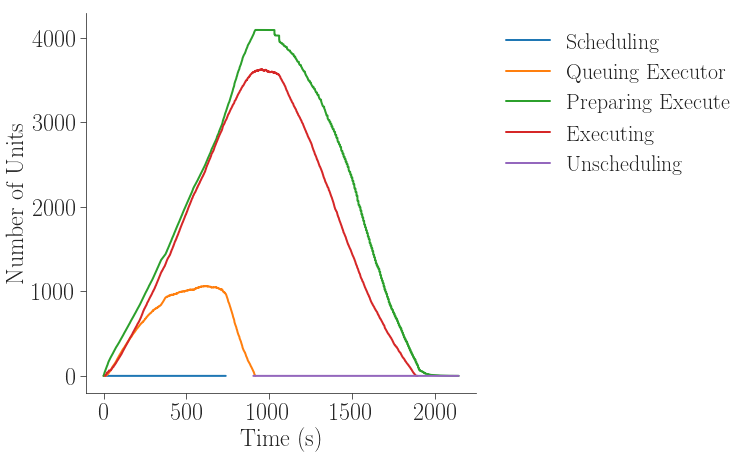

In [17]:
fig, ax = fig_setup(figsize=(7,7))
ssize = 4096
session  = ws_sras[ssize][0]

base = session.concurrency(
        event=[
         {ru.STATE: None, ru.EVENT: 'schedule_try'},
         {ru.STATE: None, ru.EVENT: 'schedule_ok'}]
       )[0][0]

# How many units are being scheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'schedule_try'},               # Scheduling start
 {ru.STATE: None, ru.EVENT: 'schedule_ok'}])               # Scheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[6])

# How many units are being queued for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING_PENDING', ru.EVENT: 'state'}, # Queuing Execution start
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'}])        # Queuing Execution stop  
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[4])

# How many units are being prepared for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'},         # Preparing Execution start
 {ru.STATE: None, ru.EVENT: 'exec_stop'}])                 # Preparing Execution stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[12])

# How many units are being executed
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'app_start'},                   # Execution start
 {ru.STATE: None, ru.EVENT: 'app_stop'}])                   # Executed
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[0])

# How many units are being unscheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'unschedule_start'},            # Unscheduling start
 {ru.STATE: None, ru.EVENT: 'unschedule_stop'}])            # Unscheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[8])

ax.legend(#ncol=3, 
          loc='upper right', bbox_to_anchor=(1.7,1),
          labels=['Scheduling', 'Queuing Executor', 'Preparing Execute', 
                  # 'Checking Directory', 'Spawning', 
                  'Executing', 'Unscheduling'])
plt.xlabel('Time (s)')
plt.ylabel('Number of Units')

#ax.set_ylim(0,4096)

# plt.savefig('figures/paper_titan_rp_synapse_weak_scaling_concurrency_%s.pdf' % ssize, dpi=300, bbox_inches='tight')
# plt.savefig('figures/screen_titan_rp_synapse_weak_scaling_concurrency_%s.pdf' % ssize, dpi=72, bbox_inches='tight')

Text(0,0.5,u'Time (s)')

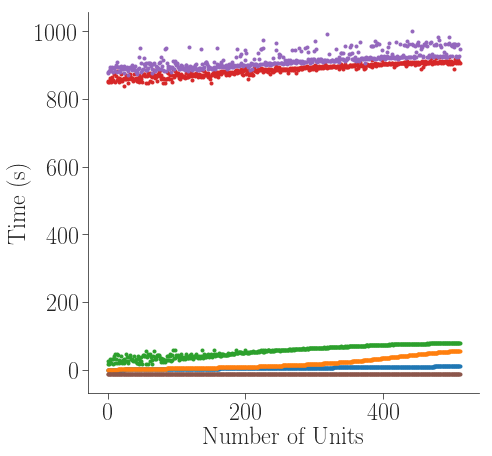

In [18]:
fig, ax  = fig_setup(figsize=(7,7))
ssize = 512
session  = ws_sras[ssize][0]

# Get events and order them by Scheduling
df = get_df_unit_events(session)
df = df.sort_values(by='Scheduler Starts Schedule')
df = df.reset_index(drop=True)
df = df[['Scheduler Starts Schedule' , 'Scheduler Stops Schedule', 'Scheduler Queues CU'  , 'Executor Starts'            ,
         'Executor Starts Mkdir'     , 'Executor Stops Mkdir'    , 'Executor Spawns CU'   , 'OS Accepts Spawned CU'      ,
         'OS Spawns CU'              , 'CU Changes Dir'          , 'CU Starts Pre-execute', 'CU Stops Pre-execute'       ,
         'CU Spawns Executable'      , 'Executable Starts'       , 'Executable Stops'     , 'CU Spawn Returns'           ,
         'CU Starts Post-execute'    , 'CU Stops Post-execute'   , 'Executor Stops'       , 'Scheduler Starts Unschedule',
         'Scheduler Stops Unschedule', 'DB Bridge Pulls']]
df = df.dropna(axis=1, how='all')
df = df.sub(df['Scheduler Starts Schedule'][0])

# plt.scatter(df['Scheduler Starts Schedule'].index  , df['Scheduler Starts Schedule']  , marker='.') # Agent Scheduling Component
# plt.scatter(df['Scheduler Stops Schedule'].index   , df['Scheduler Stops Schedule']   , marker='.') # Agent Scheduling Component
plt.scatter(df['Scheduler Queues CU'].index        , df['Scheduler Queues CU']        , marker='.') # Agent Scheduling Component
plt.scatter(df['Executor Starts'].index            , df['Executor Starts']            , marker='.') # Agent Executing Component
# plt.scatter(df['Executor Starts Mkdir'].index      , df['Executor Starts Mkdir']      , marker='.') # Agent Executing Component
# plt.scatter(df['Executor Stops Mkdir'].index       , df['Executor Stops Mkdir']       , marker='.') # Agent Executing Component
# plt.scatter(df['Executor Spawns CU'].index         , df['Executor Spawns CU']         , marker='.') # Agent Executing Component
# plt.scatter(df['OS Accepts Spawned CU'].index      , df['OS Accepts Spawned CU']      , marker='.') # System OS
# plt.scatter(df['OS Spawns CU'].index               , df['OS Spawns CU']               , marker='.') # System OS
# plt.scatter(df['CU Changes Dir'].index             , df['CU Changes Dir']             , marker='.') # CU script
# plt.scatter(df['CU Starts Pre-execute'].index      , df['CU Starts Pre-execute']      , marker='.') # CU script
# plt.scatter(df['CU Stops Pre-execute'].index       , df['CU Stops Pre-execute']       , marker='.') # CU script
# plt.scatter(df['CU Spawns Executable'].index       , df['CU Spawns Executable']       , marker='.') # CU script [orterun spawner]
plt.scatter(df['Executable Starts'].index          , df['Executable Starts']          , marker='.') # Synapse
plt.scatter(df['Executable Stops'].index           , df['Executable Stops']           , marker='.') # Synapse, orterun [orterun spawner]
plt.scatter(df['CU Spawn Returns'].index           , df['CU Spawn Returns']           , marker='.') # CU script
# plt.scatter(df['CU Starts Post-execute'].index     , df['CU Starts Post-execute']     , marker='.') # CU script
# plt.scatter(df['CU Stops Post-execute'].index      , df['CU Stops Post-execute']      , marker='.') # CU script
# plt.scatter(df['Executor Stops'].index             , df['Executor Stops']             , marker='.') # Agent Executing Component
# plt.scatter(df['Scheduler Starts Unschedule'].index, df['Scheduler Starts Unschedule'], marker='.') # Agent Scheduling Component
# plt.scatter(df['Scheduler Stops Unschedule'].index , df['Scheduler Stops Unschedule'] , marker='.') # Agent Scheduling Component
plt.scatter(df['DB Bridge Pulls'].index  , df['DB Bridge Pulls']  , marker='.') # Agent Scheduling Component

# plt.legend(loc='upper right', bbox_to_anchor=(1.7,1))
plt.xlabel('Number of Units')
plt.ylabel('Time (s)')

# plt.savefig('figures/paper_titan_rp_synapse_weak_scaling_events_timeline_%s.pdf' % ssize, dpi=300, bbox_inches='tight')
# plt.savefig('figures/screen_titan_rp_synapse_weak_scaling_events_timeline_%s.pdf' % ssize, dpi=72, bbox_inches='tight')

Text(0,0.5,u'Time (s)')

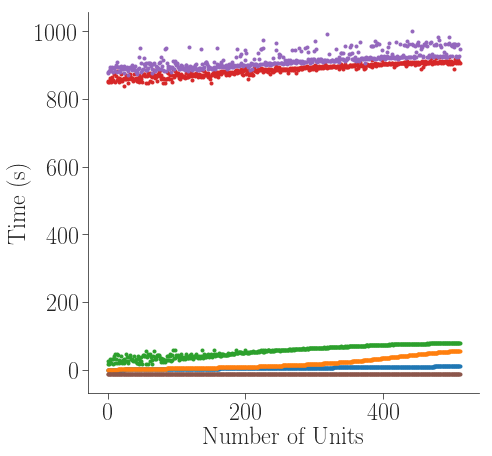

In [19]:
fig, ax  = fig_setup(figsize=(7,7))
ssize = 512
session  = ws_sras[ssize][0]

# Get events and order them by Scheduling
df = get_df_unit_events(session)
df = df.sort_values(by='Scheduler Starts Schedule')
df = df.reset_index(drop=True)
df = df[['Scheduler Starts Schedule' , 'Scheduler Stops Schedule', 'Scheduler Queues CU'  , 'Executor Starts'            ,
         'Executor Starts Mkdir'     , 'Executor Stops Mkdir'    , 'Executor Spawns CU'   , 'OS Accepts Spawned CU'      ,
         'OS Spawns CU'              , 'CU Changes Dir'          , 'CU Starts Pre-execute', 'CU Stops Pre-execute'       ,
         'CU Spawns Executable'      , 'Executable Starts'       , 'Executable Stops'     , 'CU Spawn Returns'           ,
         'CU Starts Post-execute'    , 'CU Stops Post-execute'   , 'Executor Stops'       , 'Scheduler Starts Unschedule',
         'Scheduler Stops Unschedule', 'DB Bridge Pulls']]
df = df.dropna(axis=1, how='all')
df = df.sub(df['Scheduler Starts Schedule'][0])

ax.scatter(df['Scheduler Queues CU'].index        , df['Scheduler Queues CU']        , marker='.') # Agent Scheduling Component
ax.scatter(df['Executor Starts'].index            , df['Executor Starts']            , marker='.') # Agent Executing Component
ax.scatter(df['Executable Starts'].index          , df['Executable Starts']          , marker='.') # Synapse
ax.scatter(df['Executable Stops'].index           , df['Executable Stops']           , marker='.') # Synapse, orterun [orterun spawner]
ax.scatter(df['CU Spawn Returns'].index           , df['CU Spawn Returns']           , marker='.') # CU script
ax.scatter(df['DB Bridge Pulls'].index  , df['DB Bridge Pulls']  , marker='.') # Agent Scheduling Component

# plt.legend(loc='upper right', bbox_to_anchor=(1.7,1))
plt.xlabel('Number of Units')
plt.ylabel('Time (s)')

Text(0,0.5,u'Time (s)')

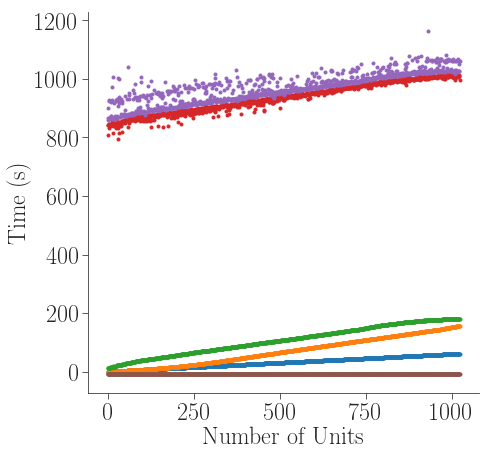

In [20]:
fig, ax  = fig_setup(figsize=(7,7))
ssize = 1024
session  = ws_sras[ssize][0]


# Get events and order them by Scheduling
df = get_df_unit_events(session)
df = df.sort_values(by='Scheduler Starts Schedule')
df = df.reset_index(drop=True)
df = df[['Scheduler Starts Schedule' , 'Scheduler Stops Schedule', 'Scheduler Queues CU'  , 'Executor Starts'            ,
         'Executor Starts Mkdir'     , 'Executor Stops Mkdir'    , 'Executor Spawns CU'   , 'OS Accepts Spawned CU'      ,
         'OS Spawns CU'              , 'CU Changes Dir'          , 'CU Starts Pre-execute', 'CU Stops Pre-execute'       ,
         'CU Spawns Executable'      , 'Executable Starts'       , 'Executable Stops'     , 'CU Spawn Returns'           ,
         'CU Starts Post-execute'    , 'CU Stops Post-execute'   , 'Executor Stops'       , 'Scheduler Starts Unschedule',
         'Scheduler Stops Unschedule', 'DB Bridge Pulls']]
df = df.dropna(axis=1, how='all')
df = df.sub(df['Scheduler Starts Schedule'][0])

# plt.scatter(df['Scheduler Starts Schedule'].index  , df['Scheduler Starts Schedule']  , marker='.') # Agent Scheduling Component
# plt.scatter(df['Scheduler Stops Schedule'].index   , df['Scheduler Stops Schedule']   , marker='.') # Agent Scheduling Component
plt.scatter(df['Scheduler Queues CU'].index        , df['Scheduler Queues CU']        , marker='.') # Agent Scheduling Component
plt.scatter(df['Executor Starts'].index            , df['Executor Starts']            , marker='.') # Agent Executing Component
# plt.scatter(df['Executor Starts Mkdir'].index      , df['Executor Starts Mkdir']      , marker='.') # Agent Executing Component
# plt.scatter(df['Executor Stops Mkdir'].index       , df['Executor Stops Mkdir']       , marker='.') # Agent Executing Component
# plt.scatter(df['Executor Spawns CU'].index         , df['Executor Spawns CU']         , marker='.') # Agent Executing Component
# plt.scatter(df['OS Accepts Spawned CU'].index      , df['OS Accepts Spawned CU']      , marker='.') # System OS
# plt.scatter(df['OS Spawns CU'].index               , df['OS Spawns CU']               , marker='.') # System OS
# plt.scatter(df['CU Changes Dir'].index             , df['CU Changes Dir']             , marker='.') # CU script
# plt.scatter(df['CU Starts Pre-execute'].index      , df['CU Starts Pre-execute']      , marker='.') # CU script
# plt.scatter(df['CU Stops Pre-execute'].index       , df['CU Stops Pre-execute']       , marker='.') # CU script
# plt.scatter(df['CU Spawns Executable'].index       , df['CU Spawns Executable']       , marker='.') # CU script [orterun spawner]
plt.scatter(df['Executable Starts'].index          , df['Executable Starts']          , marker='.') # Synapse
plt.scatter(df['Executable Stops'].index           , df['Executable Stops']           , marker='.') # Synapse, orterun [orterun spawner]
plt.scatter(df['CU Spawn Returns'].index           , df['CU Spawn Returns']           , marker='.') # CU script
# plt.scatter(df['CU Starts Post-execute'].index     , df['CU Starts Post-execute']     , marker='.') # CU script
# plt.scatter(df['CU Stops Post-execute'].index      , df['CU Stops Post-execute']      , marker='.') # CU script
# plt.scatter(df['Executor Stops'].index             , df['Executor Stops']             , marker='.') # Agent Executing Component
# plt.scatter(df['Scheduler Starts Unschedule'].index, df['Scheduler Starts Unschedule'], marker='.') # Agent Scheduling Component
# plt.scatter(df['Scheduler Stops Unschedule'].index , df['Scheduler Stops Unschedule'] , marker='.') # Agent Scheduling Component
plt.scatter(df['DB Bridge Pulls'].index  , df['DB Bridge Pulls']  , marker='.') # Agent Scheduling Component

# plt.legend(loc='upper right', bbox_to_anchor=(1.7,1))
plt.xlabel('Number of Units')
plt.ylabel('Time (s)')

#plt.savefig('figures/paper_titan_rp_synapse_weak_scaling_events_timeline_%s.pdf' % ssize, dpi=300, bbox_inches='tight')

Text(0,0.5,u'Time (s)')

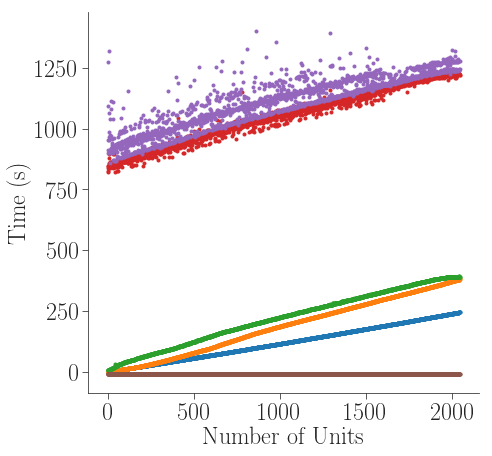

In [21]:
fig, ax  = fig_setup(figsize=(7,7))
ssize = 2048
session  = ws_sras[ssize][0]

# Get events and order them by Scheduling
df = get_df_unit_events(session)
df = df.sort_values(by='Scheduler Starts Schedule')
df = df.reset_index(drop=True)
df = df[['Scheduler Starts Schedule' , 'Scheduler Stops Schedule', 'Scheduler Queues CU'  , 'Executor Starts'            ,
         'Executor Starts Mkdir'     , 'Executor Stops Mkdir'    , 'Executor Spawns CU'   , 'OS Accepts Spawned CU'      ,
         'OS Spawns CU'              , 'CU Changes Dir'          , 'CU Starts Pre-execute', 'CU Stops Pre-execute'       ,
         'CU Spawns Executable'      , 'Executable Starts'       , 'Executable Stops'     , 'CU Spawn Returns'           ,
         'CU Starts Post-execute'    , 'CU Stops Post-execute'   , 'Executor Stops'       , 'Scheduler Starts Unschedule',
         'Scheduler Stops Unschedule', 'DB Bridge Pulls']]
df = df.dropna(axis=1, how='all')
df = df.sub(df['Scheduler Starts Schedule'][0])

# plt.scatter(df['Scheduler Starts Schedule'].index  , df['Scheduler Starts Schedule']  , marker='.') # Agent Scheduling Component
# plt.scatter(df['Scheduler Stops Schedule'].index   , df['Scheduler Stops Schedule']   , marker='.') # Agent Scheduling Component
plt.scatter(df['Scheduler Queues CU'].index        , df['Scheduler Queues CU']        , marker='.') # Agent Scheduling Component
plt.scatter(df['Executor Starts'].index            , df['Executor Starts']            , marker='.') # Agent Executing Component
# plt.scatter(df['Executor Starts Mkdir'].index      , df['Executor Starts Mkdir']      , marker='.') # Agent Executing Component
# plt.scatter(df['Executor Stops Mkdir'].index       , df['Executor Stops Mkdir']       , marker='.') # Agent Executing Component
# plt.scatter(df['Executor Spawns CU'].index         , df['Executor Spawns CU']         , marker='.') # Agent Executing Component
# plt.scatter(df['OS Accepts Spawned CU'].index      , df['OS Accepts Spawned CU']      , marker='.') # System OS
# plt.scatter(df['OS Spawns CU'].index               , df['OS Spawns CU']               , marker='.') # System OS
# plt.scatter(df['CU Changes Dir'].index             , df['CU Changes Dir']             , marker='.') # CU script
# plt.scatter(df['CU Starts Pre-execute'].index      , df['CU Starts Pre-execute']      , marker='.') # CU script
# plt.scatter(df['CU Stops Pre-execute'].index       , df['CU Stops Pre-execute']       , marker='.') # CU script
# plt.scatter(df['CU Spawns Executable'].index       , df['CU Spawns Executable']       , marker='.') # CU script [orterun spawner]
plt.scatter(df['Executable Starts'].index          , df['Executable Starts']          , marker='.') # Synapse
plt.scatter(df['Executable Stops'].index           , df['Executable Stops']           , marker='.') # Synapse, orterun [orterun spawner]
plt.scatter(df['CU Spawn Returns'].index           , df['CU Spawn Returns']           , marker='.') # CU script
# plt.scatter(df['CU Starts Post-execute'].index     , df['CU Starts Post-execute']     , marker='.') # CU script
# plt.scatter(df['CU Stops Post-execute'].index      , df['CU Stops Post-execute']      , marker='.') # CU script
# plt.scatter(df['Executor Stops'].index             , df['Executor Stops']             , marker='.') # Agent Executing Component
# plt.scatter(df['Scheduler Starts Unschedule'].index, df['Scheduler Starts Unschedule'], marker='.') # Agent Scheduling Component
# plt.scatter(df['Scheduler Stops Unschedule'].index , df['Scheduler Stops Unschedule'] , marker='.') # Agent Scheduling Component
plt.scatter(df['DB Bridge Pulls'].index  , df['DB Bridge Pulls']  , marker='.') # Agent Scheduling Component

# plt.legend(loc='upper right', bbox_to_anchor=(1.7,1))
plt.xlabel('Number of Units')
plt.ylabel('Time (s)')

#plt.savefig('figures/paper_titan_rp_synapse_weak_scaling_events_timeline_%s.pdf' % ssize, dpi=300, bbox_inches='tight')

Text(0,0.5,u'Time (s)')

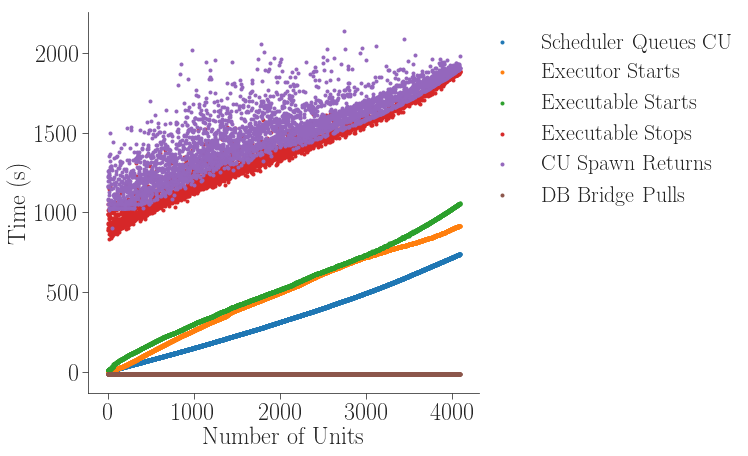

In [22]:
fig, ax  = fig_setup(figsize=(7,7))
ssize = 4096
session  = ws_sras[ssize][0]

# Get events and order them by Scheduling
df = get_df_unit_events(session)
df = df.sort_values(by='Scheduler Starts Schedule')
df = df.reset_index(drop=True)
df = df[['Scheduler Starts Schedule' , 'Scheduler Stops Schedule', 'Scheduler Queues CU'  , 'Executor Starts'            ,
         'Executor Starts Mkdir'     , 'Executor Stops Mkdir'    , 'Executor Spawns CU'   , 'OS Accepts Spawned CU'      ,
         'OS Spawns CU'              , 'CU Changes Dir'          , 'CU Starts Pre-execute', 'CU Stops Pre-execute'       ,
         'CU Spawns Executable'      , 'Executable Starts'       , 'Executable Stops'     , 'CU Spawn Returns'           ,
         'CU Starts Post-execute'    , 'CU Stops Post-execute'   , 'Executor Stops'       , 'Scheduler Starts Unschedule',
         'Scheduler Stops Unschedule', 'DB Bridge Pulls']]
df = df.dropna(axis=1, how='all')
df = df.sub(df['Scheduler Starts Schedule'][0])

# plt.scatter(df['Scheduler Starts Schedule'].index  , df['Scheduler Starts Schedule']  , marker='.') # Agent Scheduling Component
# plt.scatter(df['Scheduler Stops Schedule'].index   , df['Scheduler Stops Schedule']   , marker='.') # Agent Scheduling Component
plt.scatter(df['Scheduler Queues CU'].index        , df['Scheduler Queues CU']        , marker='.') # Agent Scheduling Component
plt.scatter(df['Executor Starts'].index            , df['Executor Starts']            , marker='.') # Agent Executing Component
# plt.scatter(df['Executor Starts Mkdir'].index      , df['Executor Starts Mkdir']      , marker='.') # Agent Executing Component
# plt.scatter(df['Executor Stops Mkdir'].index       , df['Executor Stops Mkdir']       , marker='.') # Agent Executing Component
# plt.scatter(df['Executor Spawns CU'].index         , df['Executor Spawns CU']         , marker='.') # Agent Executing Component
# plt.scatter(df['OS Accepts Spawned CU'].index      , df['OS Accepts Spawned CU']      , marker='.') # System OS
# plt.scatter(df['OS Spawns CU'].index               , df['OS Spawns CU']               , marker='.') # System OS
# plt.scatter(df['CU Changes Dir'].index             , df['CU Changes Dir']             , marker='.') # CU script
# plt.scatter(df['CU Starts Pre-execute'].index      , df['CU Starts Pre-execute']      , marker='.') # CU script
# plt.scatter(df['CU Stops Pre-execute'].index       , df['CU Stops Pre-execute']       , marker='.') # CU script
# plt.scatter(df['CU Spawns Executable'].index       , df['CU Spawns Executable']       , marker='.') # CU script [orterun spawner]
plt.scatter(df['Executable Starts'].index          , df['Executable Starts']          , marker='.') # Synapse
plt.scatter(df['Executable Stops'].index           , df['Executable Stops']           , marker='.') # Synapse, orterun [orterun spawner]
plt.scatter(df['CU Spawn Returns'].index           , df['CU Spawn Returns']           , marker='.') # CU script
# plt.scatter(df['CU Starts Post-execute'].index     , df['CU Starts Post-execute']     , marker='.') # CU script
# plt.scatter(df['CU Stops Post-execute'].index      , df['CU Stops Post-execute']      , marker='.') # CU script
# plt.scatter(df['Executor Stops'].index             , df['Executor Stops']             , marker='.') # Agent Executing Component
# plt.scatter(df['Scheduler Starts Unschedule'].index, df['Scheduler Starts Unschedule'], marker='.') # Agent Scheduling Component
# plt.scatter(df['Scheduler Stops Unschedule'].index , df['Scheduler Stops Unschedule'] , marker='.') # Agent Scheduling Component
plt.scatter(df['DB Bridge Pulls'].index  , df['DB Bridge Pulls']  , marker='.') # Agent Scheduling Component

plt.legend(loc='upper right', bbox_to_anchor=(1.7,1))
plt.xlabel('Number of Units')
plt.ylabel('Time (s)')

#plt.savefig('figures/paper_titan_rp_synapse_weak_scaling_events_timeline_%s.pdf' % ssize, dpi=300, bbox_inches='tight')